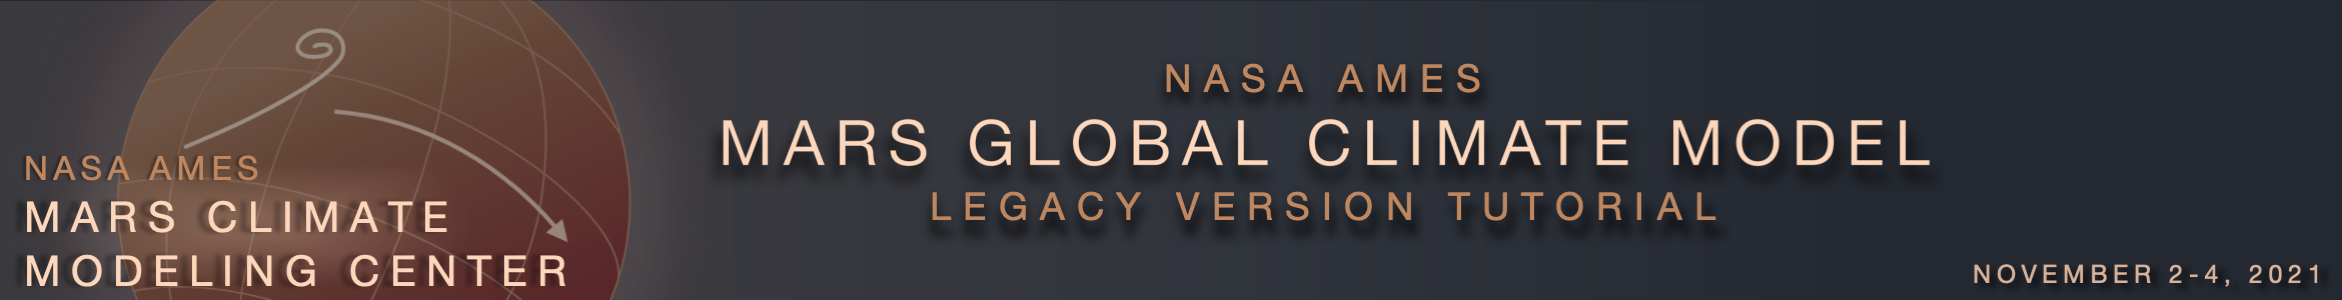

# GCM Practical: Lecture and Exercises
## Introduction

Welcome to the practical portion of the Mars Climate Modeling Center (MCMC) Legacy Mars Global Climate Model (GCM) tutorial.  By the end of this section of the tutorial, you will have the practical skills necessary to run the GCM.

The GCM presented here is extensively documented in [Haberle et al. (2019)](https://www.sciencedirect.com/science/article/pii/S0019103518305761) for your reference. 

***

<!-- TOC titleSize:2 tabSpaces:2 depthFrom:1 depthTo:6 withLinks:1 updateOnSave:1 orderedList:0 skip:0 title:1 charForUnorderedList:* -->
# Table of Contents
* [1. Installation: Clone the Repository](#1.-Installation:-Clone-the-Repository)
* [2. Configure Directory Structure (Optional)](#2.-Configure-Directory-Structure-(Optional))
* [3. Compile the Code](#3.-Compile-the-Code)
* [4. Required Input Files](#4.-Required-Input-Files)
* [5. Cold Starts](#5.-Cold-Starts)
* [6. GCM Exercise: TASK 1 - Cold Starts](#6.-GCM-Exercise:-TASK-1---Cold-Starts)
* [7. Warm Starts](#7.-Warm-Starts)
* [8. GCM Exercise: TASK 2 - Warm Starts](#8.-GCM-Exercise:-TASK-2---Warm-Starts)
* [9. History Files](#9.-History-Files)
* [10. GCM Exercises: TASK 3 - Physics Options](#10.-GCM-Exercise:-TASK-3---Physics-Options)
<!-- /TOC -->
***

# 1. Installation: Clone the Repository

```bash
(local)>$ git clone https://github.com/nasa/legacy-mars-global-climate-model.git
```

This will produce a directory called `/legacy-mars-global-climate-model`. Navigate to that directory and list its contents:

```bash
(local)>$ cd legacy-mars-global-climate-model
(local)>$ ls -l
```

The following files and directories will be visible:

```sh
README.md              # readme file with installation instructions
analysis               # directory: simple analysis routines
code                   # directory: contains the GCM source code
documentation          # directory: contains GCM documentation
run                    # directory: run the GCM (contains data directory)
tutorial               # tutorial files 
```
***

# 2. Configure Directory Structure (Optional)
    
While not necessary, it may be useful to place the different directories described above in different locations on your computer.  In particular, it may be reasonable to change the location of the `/data` and `/run` directories.

##### ```/run``` directories:

- where the executables will be run and where the output files will be created
- significant disk space required, so you might want to put it in a different location on your computer (scratch, etc.)

##### ```/data``` directory:

- where the required input files reside
- default location is in each run directory, but this will create many unnecessary `/data` directories
- may want to always point to one location for the `/data` directory
- requires source code changes

#### Update Paths to Input Files

Modify the paths in `input.f`, `laginterp.f90`, and `initcld.f` to point to your desired directories. For example, modifying the path to a topography file in `input.f` looks like:
 
```fortran
     OPEN(UNIT=9,
!     *  FILE='data/topog37x60.mola_intel',
     *  FILE='/username/path/to/gcm/data/topog37x60.mola_intel',
     *  STATUS='OLD',FORM='UNFORMATTED')
     READ(9) BOUNDUM
     CLOSE(9)
```

- Make sure to change the paths to **all** required input files.

> **NOTE:** the rest of this tutorial utilizes the default directory structure.  We recommend using the default structure unless you feel comfortable enough to make the location changes discussed above.

***

# 3. Compile the Code

From the main model directory, `/legacy-mars-global-climate-model`, navigate to the source code directory, `/code`:

```bash
(local)>$ cd code
```

For gfortran, open the `Makefile` and check that the gfortran options are uncommented.  You should see:

```fortran
#F90_COMP = ifort
#F_OPTS   = -c -O2
F90_COMP  = gfortran
F_OPTS    = -c -O3 -finit-local-zero -frecord-marker=4
```

Once the `Makefile` is ready, you can proceed with compiling the model. First, remove all object files (`*.o`), and module files (`*.mod`) to ensure a clean build by typing:

```bash
(local)>$ make clean
```

Next, compile the code by typing:

```bash
(local)>$ make
```

which creates an executable file called `gcm2.3`.

> **NOTE:** recompiling the code is **required** whenever there is a **source code** change.

***

# 4. Required Input Files

<center> <h3>Required GCM Input Files</h3> </center>

| Description               | File Name                                   | Subroutine | Data Type | Comments |
| ---                       | ---                                         | ---        | ---       | ---      |
| Topography            | topog37x60.mola_intel                       | input      | binary | horizontal resolution dependent |
| Surface Albedo        | osu_albedo_5x6_2011                         | input      | binary | horizontal resolution dependent |
| Thermal Inertia       | osu_ti_5x6_2011                             | input      | binary | horizontal resolution dependent |
| Dust Map              | TES_my24_dustscenario_zvary_37x60_6ls_intel | input      | binary | horizontal resolution dependent |
| K-coefficients (V)    | CO2H2O_V_12_95_INTEL                        | laginterp  | binary | wavelength resolution dependent |
| K-coefficients (IR)   | CO2H2O_IR_12_95_INTEL                       | laginterp  | binary | wavelength resolution dependent |
| Cloud Properties (V)  | waterCoated_vis_JD_12bands.dat              | initcld    | ascii  | wavelength resolution dependent |
| Cloud Properties (IR) | waterCoated_ir_JD_12bands.dat               | initcld    | ascii  | wavelength resolution dependent |
| Dust Properties (V)   | Dust_vis_wolff2010_JD_12bands.dat           | initcld    | ascii  | wavelength resolution dependent |
| Dust Properties (IR)  | Dust_vis_wolff2010_JD_12bands.dat           | initcld    | ascii  | wavelength resolution dependent |


## The GCM also requires a *namelist*

- The namelist (called `mars` or `restart`) contains runtime options for modifying the simulation.
- A sample `mars` file contains the following:

```fortran
&inputnl
  runnumx = 2014.11
  dlat = 5.0     jm = 36    im = 60   nlay = 24
  psf  = 7.010   ptrop = 0.0008
  dtm  = 2.0     nc3  =  8
  tautot = 0.3  rptau = 6.1  conrnu = 0.03
  taue = 480.0  tauh = 1.5    tauid = 0.0  tauih = 0.0
  rsetsw = 1
  cloudon = .false.
  active_dust = .true.
  active_water = .false.
  microphysics = .true.
  co2scav = .true.
  timesplit = .false.
  albfeed = .false.
  latent_heat = .false.
  vdust = .true.
  icealb = 0.4  icethresh_depth = 5.0
  dtsplit = 30.0
  h2ocloudform = .false.
  vary_conr = .false.
 /
```

### Example Option Combinations for Physics

- Radiatively active transported dust tracking a dust map, no cloud formation:

```fortran
active_dust = .true.
vdust = .true.
h2ocloudform = .false.
```

- Prescribed globally uniform dust, no cloud formation:

```fortran
tautot = 0.3
active_dust = .false.
vdust = .false.
h2ocloudform = .false.
```

- Radiatively active transported dust tracking a dust map, radiatively inert water ice cloud formation:

```fortran
cloudon = .false.
active_dust = .true.
vdust = .true.
h2ocloudform = .true.
```

- Radiatively active transported dust tracking a dust map, radiatively inert water ice cloud formation, with microphysics timesplitting:

```fortran
cloudon = .true.
active_dust = .true.
timesplit = .true.
vdust = .true.
dtsplit = 30.0
h2ocloudform = .true.
```

> **IMPORTANT NOTE:** Not all flag combinations will work, and the model will not necessarily tell you which combinations are bad.  If you have questions, ask us!


<center> <h3>Namelist Details</h3> </center>

| Parameter      | Type    | Description                                     | Units   | Notes                                  |
| ---:           | :---:   | :---                                            | :---:   | :---                                   |
| `runnumx`      | real    | run identifier                                  |         |                                        |
| `dlat`         | real    | degrees between latitude grid points            | degrees |                                        |
| `jm`           | integer | number of latitude grid points                  |         |                                        |
| `im`           | integer | number of longitude grid points                 |         |                                        |
| `nlay`         | integer | number of layers                                |         |                                        |
| `psf`          | real    | average surface pressure                        | mbar    |                                        |
| `ptrop`        | real    | pressure at the tropopause                      | mbar    |                                        |
| `dtm`          | real    |  requested time step                            | minutes |                                        |
| `tautot`       | real    | visible dust optical depth at the reference pressure level |                                        |
| `rptau`        | real    | the reference pressure level tautot uses        | mbar    |                                        |
| `taue`         | real    | requested run time                              | hours   |                                        |
| `tauh`         | real    | history output frequency                        | hours   |                                        |
| `tauid`        | real    | starting time in days                           |         | *leave 0 for now*                      |
| `tauih`        | real    | starting time of run                            | hours   | *0 for cold starts; time of 1<sup>st</sup> record of a warm start file* |
| `nc3`          | integer | a full pass through COMP3 is done every NC3 time steps |  |                                        |
| `rsetsw`       | integer | cold start / warm start flag                    |         | *1 for cold starts; 0 for warm starts* |
| `lday`         | integer | day of a Mars year corresponding to a given Ls. |         |                                        |
| `conrnu`       | real    | dust mixing ratio scale height                  |         |                                        |
| `cloudon`      | logical | radiatively active water ice clouds             |         |                                        |
| `active_dust`  | logical | radiatively active water vapor                  |         |                                        |
| `microphysics` | logical | call MICROPHYS                                  |         | *always use true*                      |
| `co2scav`      | logical | simple treatments of CO<sub>2</sub> cloud scavenging |    |                                        |
| `timesplit`    | logical | timesplitting on                                |         | *dtsplit $\neq$ 1*                     |
| `albfeed`      | logical | surface water ice albedo feedback               |         |                                        |
| `latent_heat`  | logical | water latent heat effects                       |         | *surface and atmosphere*               |
| `vdust`        | logical | read and use dust map                           |         |                                        |
| `icealb`       | real    | albedo value of surface ice                     |         | *when albfeed = .true.*                |
| `icethresh_depth` | real | depth of ice required to reset icealb           | microns | *when albfeed = .true.*                |
| `dtsplit`      | real    | requested timesplit DT                          | seconds | *when timesplit = .true.*              |
| `h2ocloudform` | logical | h2o cloud formation                             |         |                                        |
| `vary_conr`    | logical | vary conrath parameter in latitude and ls       |         | *when active_dust = .false.*           |


<center> <h3>Day of Year (LDAY)</h3> </center>

| Ls  | Day of Year |     |     | Ls    | Day of Year |
| :-: | :-:         | :-: | :-: | :-:   | :-:         |
| 0   | 173         |     |     | 200   | 578         |
| 10  | 193         |     |     | 210   | 594         |
| 20  | 213         |     |     | 220   | 610         |
| 30  | 234         |     |     | 230   | 626         |
| 40  | 256         |     |     | 240   | 641         |
| 50  | 277         |     |     | 250   | 657         |
| 60  | 300         |     |     | 257.4 | 668         |
| 70  | 322         |     |     | 257.8 | 0           |
| 80  | 344         |     |     | 260   | 3           |
| 90  | 366         |     |     | 270   | 19          |
| 100 | 388         |     |     | 280   | 34          |
| 110 | 410         |     |     | 290   | 50          |
| 120 | 431         |     |     | 300   | 66          |
| 130 | 451         |     |     | 310   | 83          |
| 140 | 471         |     |     | 320   | 100         |
| 150 | 490         |     |     | 330   | 117         |
| 160 | 509         |     |     | 340   | 135         |
| 170 | 527         |     |     | 350   | 154         |
| 180 | 545         |     |     | 359.9 | 172         |
| 190 | 562         |     |     | 0     | 173         |

***

# 5. Cold Starts

There are two types of runs: **Cold Starts** and **Warm Starts**

1. **Cold Start:** initialized with an isothermal atmosphere & no winds at time $=0$.

2. **Warm Start:** initialized from a previous run ("spun-up") at time $\neq 0$.

We will start with learning how to do a Cold Start.

#### Steps for a Cold Start are:

1.) Move the executable `gcm2.3` to the `/run` directory and change to that directory:

```sh
(local)>$ cp gcm2.3 ../run/
(local)>$ cd ../run/
```

2.) Edit the namelist file, `mars`.

3.) Execute the code:

```bash
(local)>$ ./gcm2.3 <mars> m.out &
```

#### Standard history files are fortran binaries:

1. `fort.11`, then `fort.11_0002`, `fort.11_0003`, etc: contain bulk of information
2. `fort.45`, then `fort.45_0002`, `fort.45_0003`, etc: secondary information
3. `fort.51_0002`, `fort.51_0003`, etc: used for warm starts
4. `fort.91_0002`, `fort.91_0004`, etc: also used for warm starts

Each file nominally contains 10 sols of output (you can modify this by changing `tauh` in the namelist).

> **NOTE:** if these default settings are changed, changes will also be required in the analysis pipeline.
    
#### Methods for tracking simulation progress:

- Monitor `fort.11*` files, which are nominally 453.886 mb when full:

```sh
(local)>$ ls -l fort.11*
```

Which gives (for example):

```sh
-rw-------@ 1 user  staff  453886027 Oct 26 11:47 fort.11
-rw-------@ 1 user  staff    3189067 Oct 26 11:47 fort.11_0002
```

- Monitor the simulated hour (`TIME:`) inside the `m.out` file:

```sh
(local)>$ tail -15 m.out
```

Which gives (for example):

```sh
------------------- TIME:     240.00     Ls:  94.01
Water:  atm        cld           ice          icenpc        Total
 1.91485D+10   0.00000D+00   0.00000D+00  -1.91494D+10  -8.77906D+05
=====================================================================
```

The message at the end of `m.out` when the simulation finishes should be something similar to:

```sh
WMSG036 HAS STOPPED AT DAY  10 / HOUR 0.001
```

***

# 6. GCM Exercise: TASK 1 - Cold Starts

## It's time to practice!

We have designed a few tasks that require running the GCM on your system. These exercises will help reinforce the concepts we're discussing. These tasks assume you have already installed and compiled the GCM on your system. If you have not yet done so, we suggest following the instructions in the README.pdf (or README.md) file.


### TASK 1: Run from a Cold Start

The first exercise focuses on running the GCM from a cold start.  The first simulation we'll run is a 10-sol (240-hour) simulation that starts at $L_s=90$.  We'll have to edit the namelist to do so, but we'll otherwise use the default physics options in the tutorial namelist (`mars_tutorial`) for this exercise.

#### Steps for TASK 1:

1.) From the `/legacy-mars-global-climate-model` directory, create a new directory (`/run_task1`) to execute the model in, populate it with `gcm2.3`, `mars_tutorial`, and the `/data` directory (plus its contents), and then navigate into it:

```bash
(local)>$ mkdir run_task1
(local)>$ cp code/gcm2.3 run_task1/
(local)>$ cp tutorial/mars_tutorial run_task1/
(local)>$ scp -r run/data run_task1/
(local)>$ cd run_task1/
```

2.) Rename the `mars_tutorial` file to `mars`: 

```bash
(local)>$ mv mars_tutorial mars
```

3.) Open the `mars` file, change the starting $L_s$ (`lday`) to the value appropriate for $L_s=90$ (`lday= 366`) and the length of the simulation (`taue`) to 240 hours (`taue = 240.0`).

4.) Execute the simulation with the command:

```bash
(local)>$ ./gcm2.3 < mars > m.out&
```

5.) We need to compile `htest` as the simulation runs if you did not already do so when you installed the GCM before the tutorial. To do this, navigate to the tutorial directory and compile `htest.f90`:

```bash
(local)>$ cd ../tutorial/
(local)>$ gfortran -c historymod.f90
(local)>$ gfortran -o htest htest.f90 historymod.o
```


6.) Next, copy the `htest` (`htest.exe` on Windows) executable to the `/run` directory and navigate back to that directory:

```bash
(local)>$ cp ./htest ../run_task1/   # cp ./htest.exe ../run_task1/ on Windows
(local)>$ cd ../run_task1/
```

7.)  After the simulation finishes, run `htest` on the **first record** of the **last `fort.11`** file (`_0002`) with `J=18`, `I=1`, and `L=24`:

```bash
(local)>$ ./htest
```


You should see something very similar to:


```bash
History file name:  fort.11_0002
Record number?  1
J, I, L (Which are: Lat, Lon, Layer)  18, 1, 24

Run number: 2014.11

  History file name:  fort.11_0002
         Run number:  2014.11
      Record number:      1
               Grid:  J = 18    I =  1    L = 24

                Ls =       94.47
            RSDIST =      2.7285
            DECMAX =     25.2193
               TAU =      240.00
            TOFDAY =        0.00
Time at Grid Point =       12.00

            TAUTOT =      0.3000
             RPTAU =        6.10

        TOPOG(J,I) =   9688.4170  ----->  -2.6044 km
         ALSP(J,I) =      0.2795
      SURFALB(J,I) =      0.2795
        ZIN(J,I,1) =     69.3150
              GIDN =      0.0545       GIDS =      0.0805

               PSF =      7.0100
              GASP =      6.9672
GASP: Global Average Surface Pressure

             PTROP =  8.0000E-04
            P(J,I) =      8.1164
       TSTRAT(J,I) =    191.1051
          T(J,I,L) =    226.8797
          U(J,I,L) =     -3.9678
          V(J,I,L) =      3.9435

           GT(J,I) =    268.0048
      STEMP(J,I,1) =    210.7421        SDEPTH( 2) =    0.0075 m
      STEMP(J,I,5) =    210.3161        SDEPTH(10) =    0.0961 m

       CO2ICE(J,I) =  0.0000E+00
       ALICEN      =  0.6000            ALICES       =  0.5000
       EGOCO2N     =  0.8000            EGOCO2S      =  1.0000
      STRESSX(J,I) = -1.5937E-03        STRESSY(J,I) =  2.3552E-03
      TAUSURF(J,I) =     0.43410

      fuptopv(J,I) =   113.12054        fuptopir(J,I)  =   214.48886
      fdntopv(J,I) =   449.26962
     fupsurfv(J,I) =   115.78580        fupsurfir(J,I) =   291.84625
     fdnsurfv(J,I) =   414.32309        fdnsurfir(J,I) =    52.13027

       NPCFLAG =  F
   Water vapor =  4.4126E-10
```
 
 

- Note that the $L_s$ has advanced to $ \approx 95^\circ $.

***

# 7. Warm Starts

The second method for starting a simulation is through a warm start, where a new simulation is initialized from a previous run (i.e. at time $\neq 0$).

#### Steps for a Warm Start are:

1.) From the `/legacy-mars-global-climate-model`, create a new `/run_warm` directory, copy the `gcm2.3` executable, the `mars` file, and `htest` to it, and navigate to that directory:

```bash
(local)>$ mkdir run_warm
(local)>$ cp code/gcm2.3 run_warm/
(local)>$ cp run/mars run_warm/
(local)>$ scp -r run/data run_warm/
(local)>$ cp tutorial/htest run_warm/ # cp tutorial/htest.exe run_warm/ on Windows
(local)>$ cd run_warm/
```


2.) Rename `mars` (the namelist) to `restart`:


```bash
(local)>$ mv mars restart
```

3.) Identify the `fort.*_****` files required for the run and copy them into the `/run` directory. For example, assume we want to warm start from `fort.*_0002`. We first rename the `fort.*` files to exclude the extensions:

```bash
(local)>$ mv fort.11_0002 fort.11
(local)>$ mv fort.45_0002 fort.45
(local)>$ mv fort.51_0002 fort.51
(local)>$ mv fort.91_0002 fort.91
```

4.) When warm-starting, the model will read the first record of the `fort.11`, `fort.45`, `fort.51`, and `fort.91` files and begin the simulation from that timestamp. This timestamp also needs to be specified in the restart file as the `tauih` value. To identify the starting time, run `htest` on the `fort.11` file from which you will restart, and read the output value of time `TAU`:

> IMPORTANT NOTE: warm starts begin from the *first* record of the `fort.*` file

```bash
(local)>$ ./htest
```

```bash
History file name: fort.11
Record number? 1
J, I, L (Which are: Lat, Lon, Layer) 17, 1, 24
```

5.) Edit the namelist (`restart`) file:
    - set `rsetsw = 0`
    - set `tauih` to the value found in previous step


6.) Execute the code:

```bash
(local)>$ ./gcm2.3 <restart> m.out &
```

#### History file sequencing will then be:

1. `fort.11`, then `fort.11_0003`, `fort.11_0004`, etc
2. `fort.45`, then `fort.45_0003`, `fort.11_0004`, etc
3. `fort.51`, then `fort.51_0003`, `fort.11_0004`, etc
4. `fort.91`, then `fort.91_0003`, `fort.11_0004`, etc

    - Note that this sequencing is based on our example of warm starting from `fort.*_0002`
    - Each file nominally contains 10 sols of output (you can modify this)
    - You may want to rename the `fort.11`, `fort.45`, `fort.51`, and `fort.91` files with the `_0002` extension before processing them.  For example:
    
```bash    
(local)>$ mv fort.11 fort.11_0002
```

***

# 8. GCM Exercise: TASK 2 - Warm Starts

## It's time to practice!

We have designed a few tasks that require running the GCM on your system. These exercises will help reinforce the concepts we're discussing.

### TASK 2: Run from a Warm Start

The second exercise focuses on running the GCM from a warm start. The simulation we will run now is a continuation of our first simulation, [6. GCM Exercise: TASK 1 - Cold Starts](#6.-GCM-Exercise:-TASK-1---Cold-Starts).
 
#### Steps for TASK 2:

1.) From the `/legacy-mars-global-climate-model` directory, create a new run directory (`/run_task2`), populate it with `gcm2.3`, `mars`, `htest` (`htest.exe` on Windows), and the `/data` directory (plus its contents) **from the TASK 1 `/run` directory**, and then navigate into it:

```bash
(local)>$ mkdir run_task2
(local)>$ cp run_task1/gcm2.3 run_task2/
(local)>$ cp run_task1/mars run_task2/
(local)>$ cp run_task1/htest run_task2/  # cp run_task1/htest.exe run_task2/ on Windows
(local)>$ scp -r run_task1/data run_task2/
(local)>$ cd run_task2/
```

2.) Rename the `mars` file `restart`, copy the `fort.*_0002` files from the TASK 1 run directory into this new run directory and rename them without the `_0002` extension:

```bash
(local)>$ mv mars restart
(local)>$ cp ../run_task1/fort.*_0002 .
(local)>$ mv fort.11_0002 fort.11
(local)>$ mv fort.45_0002 fort.45
(local)>$ mv fort.51_0002 fort.51
(local)>$ mv fort.91_0002 fort.91
```

3.) Use `htest` to determine the hour (`tau = 240.0`) from which you will start the new simulation:

```bash
(local)>$ ./htest
```

```bash
History file name:  fort.11
Record number?  1
J, I, L (Which are: Lat, Lon, Layer)  1,1,1

Run number: 2014.11

   History file name:  fort.11
         Run number:  2014.11
      Record number:      1
               Grid:  J =  1    I =  1    L =  1

                Ls =       94.47
            RSDIST =      2.7285
            DECMAX =     25.2193
               TAU =      240.00
```

4.) In the `restart` file, change the starting hour (`tauih`) to the value found in the previous step (`= 240.0`) and toggle the warmstart flag (`rsetsw`) from 1 to 0.

5.) Execute the simulation with the command:

```bash
(local)>$ ./gcm2.3 <restart> m.out&
```

6.)  After the simulation finishes, run `htest` on the first record of the last `fort.11` file (`_0003`) with `J=18`, `I=1`, and `L=24`.  You should see something very similar to:

```bash
History file name:  fort.11_0003
Record number?  1
J, I, L (Which are: Lat, Lon, Layer)  18, 1, 24

Run number: 2014.11


  History file name:  fort.11_0003
         Run number:  2014.11
      Record number:      1
               Grid:  J = 18    I =  1    L = 24

                Ls =       99.04
            RSDIST =      2.7092
            DECMAX =     25.2193
               TAU =      480.00
            TOFDAY =        0.00
Time at Grid Point =       12.00

            TAUTOT =      0.3000
             RPTAU =        6.10

        TOPOG(J,I) =   9688.4170  ----->  -2.6044 km
         ALSP(J,I) =      0.2795
      SURFALB(J,I) =      0.2795
        ZIN(J,I,1) =     69.3150
              GIDN =      0.0545       GIDS =      0.0805

               PSF =      7.0100
              GASP =      6.9102
GASP: Global Average Surface Pressure

             PTROP =  8.0000E-04
            P(J,I) =      8.1203
       TSTRAT(J,I) =    192.7632
          T(J,I,L) =    226.7106
          U(J,I,L) =     -4.3707
          V(J,I,L) =      5.3277

           GT(J,I) =    267.6625
      STEMP(J,I,1) =    209.8746        SDEPTH( 2) =    0.0075 m
      STEMP(J,I,5) =    209.0226        SDEPTH(10) =    0.0961 m

       CO2ICE(J,I) =  0.0000E+00
       ALICEN      =  0.6000            ALICES       =  0.5000
       EGOCO2N     =  0.8000            EGOCO2S      =  1.0000
      STRESSX(J,I) = -2.8061E-03        STRESSY(J,I) =  3.5275E-03
      TAUSURF(J,I) =     0.48165
 
      fuptopv(J,I) =   114.52032        fuptopir(J,I)  =   213.56181
      fdntopv(J,I) =   453.28476
     fupsurfv(J,I) =   116.20900        fupsurfir(J,I) =   290.11661
     fdnsurfv(J,I) =   415.83743        fdnsurfir(J,I) =    51.76165

       NPCFLAG =  F
   Water vapor =  8.8870E-08
```

- Note that time (`TAU`) has advanced 240 hours (10 sols) from the TASK 1 simulation.

***

# 9. History Files

There are four types of output files:

```bash
fort.11*
fort.45*
fort.51*
fort.91*
```

- The `fort.51*` and `fort.91*` files are used exclusively for warm starts
- The `fort.11*` is the main output file.  
    > We do not recommend making changes to the structure or contents of the `fort.11*` files.
- The `fort.45*` is a secondary output file.  
    > If additional fields need to be outputted, we recommend adding them to the `fort.45*` files.

### Characteristics
- Each `fort.11*` file has two parts:
    - Header Record
    - Time-Dependent Records
- Each `fort.45*` file has only:
    - Time-Dependent Records
- Each `fort.11*` and `fort.45*` file has 160 time-dependent records
    - In the nominal set-up, this covers 10 sols
        - Output every 1.5 hours; 16 outputs per sol
        - You can change this in the mars/restart file (`tauh`)

> We recommend that you do **not** change the output frequency unless it is absolutely necessary. If you do make changes to the output frequency, be sure to make corresponding changes to all analysis routines.

### Header Record
- Written once at the beginning of each `fort.11*` file from `mhisth.f`
- Code for reading `fort.11*` header:

```fortran
character(len=7) :: version
integer  :: jm, im, layers, nl, ntracer
real*4   :: runnum, dsig(layers), dxyp(jm), sdepth(nl)
real*4   :: grav, rgas, cp, stbo, xlhtc, kapa, cmk, decmax, eccn
real*4   :: orbinc, vinc, alicen, alices, egoco2n, egoco2s
real*4   :: topog(jm,im), alsp(jm,im), zin(jm,im,nl)
real*4   :: npcwik
logical  :: npcflag(jm,im)

(etc)

read(20) runnum, jm, im, layers, nl, ntrace, version
read(20) dsig, dxyp, grav, rgas, cp, stbo, xlhtc, kapa, 
*          cmk, decmax, eccn, orbinc, vinc, sdepth, alicen,
*          alices, egoco2n, egoco2s, npcwikg, gidn, gids
read(20) topog, alsp, zin, npcflag
```

<center> <h3>Header Variable Descriptions</h3> </center>

| Variable       | Description                                                 | Units                            |
| ---            | ---                                                         | ---                              |
| `runnum`       | The run number                                              |                                  |
| `jm`           | Number of latitude grid points                              |                                  |
| `im`           | Number of longitude grid points                             |                                  |
| `layers`       | Number of layers in the atmosphere below the stratosphere   |                                  |
| `nl`           | Number of layers in the soil model                          |                                  |
| `ntrace`       | Number of tracers                                           |                                  |
| `version`      | Version number                                              |                                  |
| `time`         | Elapsed time from the start of the run                      | hours                            |
| `dsig(l)`      | $d\sigma$ - the layer thickness in $\sigma$ coordinates     |                                  |
| `sigma(k)`     | $\sigma$ - values of $\sigma$ at the model levels           |                                  |
| `dxyp(j)`      | The area of each grid point at latitude J                   | m<sup>2</sup>                            |
| `ptrop`        | Pressure of the tropopause                                  | mbar                             |
| `psf`          | Input global surface pressure                               | mbar                             |
| `tautot`       | Input (global) dust optical depth at the reference pressure |                                  |
| `rptau`        | Reference pressure for dust optical depth (TAUTOT)          | mbar                             |
| `nc3`          | Full COMP3 is done every nc3 time steps                     |                                  |
| `cp`           | Heat capacity of CO<sub>2</sub> gas                         | J kg<sup>-1</sup> K<sup>-1</sup>             |
| `grav`         | Acceleration due to gravity                                 | m s<sup>-2</sup>                       |
| `rgas`         | Gas constant for Mars                                       | J kg<sup>-1</sup> K<sup>-1</sup>             |
| `stbo`         | Stefan-Boltzmann constant                                   | J m<sup>-2</sup> s<sup>-1</sup> K<sup>-4</sup>     |
| `xlhtc`        | Latent heat of CO<sub>2</sub>                               | J kg<sup>-1</sup>                      |
| `decmax`       | Obliquity (maximim solar declination)                       |                                  |
| `eccn`         | Orbital eccentricity                                        |                                  |
| `orbinc`       | Inclination of the orbit to the ecliptic                    |                                  |
| `vinc`         | VINC - 90<sup>o</sup> is the true anomaly when L$_S$ = 0    |                                  |
| `sdepth(nl)`   | Depth at the mid-point of each soil layer. (m)              |                                  |
| `alicen`       | Albedo of CO<sub>2</sub> surface ice in the north polar cap         |                                  |
| `alices`       | Albedo of CO<sub>2</sub> surface ice in the south polar cap         |                                  |
| `egoco2n`      | Emissivity of CO<sub>2</sub> surface ice in the north polar cap     |                                  |
| `egoco2s`      | Emissivity of CO<sub>2</sub> surface ice in the south polar cap     |                                  |
| `jequator`     | J index of the equator                                      |                                  |
| `npcwikg`      | Initial north polar cap water ice (kg)                      |                                  |
| `topog(j,i)`   | Surface topography (-geopotential)                          |  m<sup>2</sup> s<sup>-2</sup>    |
| `alsp(j,i)`    | Surface albedo                                              |                                  |
| `zin(j,i,nl)`  | Surface thermal inertia                                     | J m<sup>-2</sup> K<sup>-1</sup> s<sup>-1/2</sup> |
| `npcflag(j,i)` | Logical flag, true if polar cap exists at this grid point   |                                  |


### Time-Dependent Records
- Written to `fort.11*` and `fort.45` files every `tauh` hours from `mhistv.f`
- Code for reading one `fort.11*` record:

```fortran
integer :: nc3, ncycle
real*4  :: tau, ls, rsdist, tofday, psf, ptrop, tautot
real*4  :: rptau, sind, gasp
real*4  :: p(jm,im)
real*4  :: t(jm,im,layers), u(jm,im,layers), v(jm,im,layers)
real*4  :: gt(jm,im), co2ice(jm,im), tstrat(jm,im), tausurf(jm,im)
real*4  :: ssun(jm,im), stemp(jm,im,nl)
real*4  :: qtrace(jm,im,layers,ntrace), qcond(jm,im,ntrace)
real*4  :: fuptopv(jm,im), fdntopv(jm,im)
real*4  :: fupsurfv(jm,im),fdnsurfv(jm,im)
real*4  :: fuptopir(jm,im), fupsurfir(jm,im), fdnsurfir(jm,im)
real*4  :: surfalb(jm,im), dheat(jm,im,layers), geop(jm,im,layers)

(etc)

read(20) tau, ls, rsdist, tofday, psf, ptrop, tautot,
*         rptau, sind, gasp
read(20) nc3, ncycle

read(20) p
read(20) t
read(20) u
read(20) v
read(20) gt
read(20) co2ice
read(20) stressx
read(20) stressy
read(20) tstrat
read(20) tausurf
read(20) ssun
read(20) qtrace
read(20) qcond
read(20) stemp
read(20) fuptopv, fdntopv, fupsurfv, fdnsurfv
read(20) fuptopir, fupsurfir, fdnsurfir
read(20) surfalb
read(20) dheat
read(20) geop
```

- Code for reading one `fort.45*` record:

```fortran
real*4 :: tau2, ls2, tofday2
real*4 :: srfupflx(jm,im,ntrace), srfdnflx(jm,im,ntrace)
real*4 :: tauref3d(jm,im,2*layers+3)

(etc)

read(21) tau2, ls2, tofday2, srfupflx, srfdnflx, tauref3d
```

<center> <h3>fort.11 Variable Descriptions</h3> </center>

| Variable         | Description                                                  | Units          |
| ---              | ---                                                          | ---            |
| `tau`            | Elapsed time from the start of the run                       | hours          |
| `tofday`         | Time of day at 0<sup>o</sup> longitude                       | hours          |
| `Ls`             | Seasonal date                                                | degrees        |
| `rsdist`         | Square of the Sun-Mars distance                              | AU<sup>2</sup> |
| `psf`            | Initial global surface pressure                              | mbar           |
| `ptrop`          | Pressure at the tropopause                                   | mbar           |
| `sind`           | Sine of the sub-solar latitude                               |                |
| `tautot`         | Input (global) dust optical depth at the reference pressure  |                |
| `rptau`          | Reference pressure for dust optical depth (TAUTOT)           | mbar           |
| `gasp`           | Global average surface pressure                              | mbar           |
| `nc3`            | Full COMP3 is done every nc3 time steps                      |                |
| `p(j,i)`         | PI (Surface pressure - $P_{trop}$)                           | mbar           |
| `t(j,i,l)`       | Atmosphere temperature                                       | K              |
| `u(j,i,l)`       | Zonal wind                                                   |  m s<sup>-1</sup>    |
| `v(j,i,l`       | Meridional wind                                              | m s<sup>-1</sup>     |
| `tstrat(j,i)`    | Stratosphere temperature                                     | K              |
| `gt(j,i)`        | Ground temperature                                           | K              |
| `co2ice(j,i)`    | Amount of CO<sub>2</sub> ice on the ground                   | kg m<sup>-2</sup>    |
| `stressx(j,i)`   | Surface stress - zonal component (carried at PI points)      | N m<sup>-2</sup>     |
| `stressy(j,i)`   | Surface stress - meridional component (carried at PI points) | N m<sup>-2</sup>     |
| `tausurf(j,i)`   | Dust optical depth (in visible) at the surface               |                |
| `ssun(j,i)`      | Solar energy absorbed by the atmosphere                      | W m<sup>-2</sup>     |
| `qtrace(j,i,l,n)`| Tracer mass mixing ratio                                     | kg kg<sup>-1</sup>   |
| `qcond(j,i,n)`   | Amount of tracer (n) on the ground                           | kg m<sup>-2</sup>    |
| `stemp(j,i,nl)`  | Sub-surface soil temperature                                 | K              |
| `fuptopv(j,i)`   | Upward visible flux at the top of the atmosphere             | W m<sup>-2</sup>     |
| `fdntopv(j,i)`   | Downward visible flux at the top of the atmosphere           | W m<sup>-2</sup>     |
| `fupsurfv(j,i)`  | Upward visible flux at the surface                           | W m<sup>-2</sup>     |
| `fdnsurfv(j,i)`  | Downward visible flux at the surface                         | W m<sup>-2</sup>     |
| `fuptopir(j,i)`  | Upward IR flux at the top of the atmosphere                  | W m<sup>-2</sup>     |
| `fupsurfir(j,i)` | Upward IR flux at the surface                                | W m<sup>-2</sup>     |
| `fdndurfir(j,i)` | Downward IR flux at the surface                              | W m<sup>-2</sup>     |
| `surfalb(j,i)`   | Surface albedo                                               |                |
| `dheat(j,i,l)`   | Total diabatic heating rate                                  | K sol<sup>-1</sup>   |
| `geop(j,i,l)`    |  Geopotential                                                | m<sup>2</sup> s<sup>-2</sup> |


<center> <h3>fort.45 Variable Descriptions</h3> </center>


| Variable          | Description                             | Units               |
| ---               | ---                                     | ---                 |
| `tau2`            | Elapsed time from the start of the run  | hours               |
| `tofday2`         | Time of day at 0<sup>o</sup> longitude  | hours               |
| `Ls2`             | Seasonal date                           | degrees             |
| `srfupflx(j,i,n)` | Upward flux of tracers from the surface | kg m<sup>-2</sup> s<sup>-1</sup>|
| `srfdnflx(j,i,n)` | Downward flux of tracers to the surface | kg m<sup>-2</sup> s<sup>-1</sup>|

***

# 10. GCM Exercise: TASK 3 - Physics Options

## It's time to practice!

We have designed a few tasks that require running the GCM on your system. These exercises will help reinforce the concepts we're discussing.


### TASK 3: Run with Modified Runtime Physics Options

The third exercise has two parts and focuses on running the GCM from with modified options for the treatment of dust. Instead of using radiatively active transported dust (`ACTIVE_DUST = .TRUE.`), these simulations will use **prescribed dust in the vertical** (`ACTIVE_DUST = .FALSE.`) with globally **uniform and constant** (`VDUST = .FALSE.`) total column dust optical depths that can be set to any value (`TAUTOT = VALUE`).  

We will execute two simulation with `TAUTOT` values of (a) 0.3 and (b) 2.0, respectively, which represent (a) low and (b) high dust loading cases:

#### TASK 3a: Global Dust Optical Depth = 0.3
#### TASK 3b: Global Dust Optical Depth = 2.0

We will test these new options by warm starting a simulation from the end of the TASK 1 simulation, which means that the warm start files used for TASK 3 are the same as those used for TASK 2.

### TASK 3a: Global Dust Optical Depth = 0.3

#### Steps for TASK 3a:

1.) Create a new run directory and populate it with `gcm2.3`, `restart`, `htest`, and the `/data` directory (plus its contents) **from the TASK 2 `/run` directory**.

2.) Copy the `fort.*_0002` files **from the TASK 1 `/run` directory** into this new directory and rename them without the `_0002` extension.

3.) In the `restart` file, change the following flags to:
- `active_dust = .false.`
- `vdust = .false.`
    
4.) Also in the `restart` file, verify that `tautot = 0.3`.

5.) Execute the simulation.

6.)  After the simulation finishes, run `htest` on the first record of the last `fort.11` file (`_0003`) with `J=18`, `I=1`, and `L=24`.  You should see something very similar to:

```bash
History file name:  fort.11_0003
Record number?  1
J, I, L (Which are: Lat, Lon, Layer)  18, 1, 24

Run number: 2014.11
 
 
  History file name:  fort.11_0003
         Run number:  2014.11
      Record number:      1
               Grid:  J = 18    I =  1    L = 24

                Ls =       99.04
            RSDIST =      2.7092
            DECMAX =     25.2193
               TAU =      480.00
            TOFDAY =        0.00
Time at Grid Point =       12.00

            TAUTOT =      0.3000
             RPTAU =        6.10
 
        TOPOG(J,I) =   9688.4170  ----->  -2.6044 km
         ALSP(J,I) =      0.2795
      SURFALB(J,I) =      0.2795
        ZIN(J,I,1) =     69.3150
              GIDN =      0.0545       GIDS =      0.0805
 
               PSF =      7.0100
              GASP =      6.9155
 GASP: Global Average Surface Pressure

             PTROP =  8.0000E-04
            P(J,I) =      8.1335
       TSTRAT(J,I) =    191.7084
          T(J,I,L) =    226.1000
          U(J,I,L) =     -2.6611
          V(J,I,L) =      5.0604
 
           GT(J,I) =    267.7570
      STEMP(J,I,1) =    210.1247        SDEPTH( 2) =    0.0075 m
      STEMP(J,I,5) =    208.9654        SDEPTH(10) =    0.0961 m
 
       CO2ICE(J,I) =  0.0000E+00
       ALICEN      =  0.6000            ALICES       =  0.5000
       EGOCO2N     =  0.8000            EGOCO2S      =  1.0000
      STRESSX(J,I) = -3.0583E-03        STRESSY(J,I) =  4.2290E-03
      TAUSURF(J,I) =     0.41011
 
      fuptopv(J,I) =   116.24009        fuptopir(J,I)  =   213.04865
      fdntopv(J,I) =   453.28494
     fupsurfv(J,I) =   117.04001        fupsurfir(J,I) =   290.54834
     fdnsurfv(J,I) =   418.81110        fdnsurfir(J,I) =    51.34554
 
       NPCFLAG =  F
   Water vapor =  7.9585E-08
```

- Note that the ground temperature (`GT`) at this grid point is $\approx 267.75$ K and the (near-> surface, since we chose L = 24) air temperature (`T`) is $\approx 226.1$ K.


### TASK 3b: Global Dust Optical Depth = 2.0

#### Steps for TASK 3b:

1.) Create a new run directory and populate it with `gcm2.3`, `restart`, `htest`, and the `/data` directory (plus its contents) **from the TASK 2 `/run` directory**.

2.) Copy the `fort.*_0002` files **from the TASK 1 `/run` directory** into this new directory and rename them without the `_0002` extension.

3.) In the `restart` file, change the following flag to: `tautot = 2.0`
    
4.) Also in the `restart` file, verify that:

- `active_dust = .false.`
- `vdust = .false.`

5.) Execute the simulation.

6.)  After the simulation finishes, run `htest` on the first record of the last `fort.11` file (`_0003`) with `J=18`, `I=1`, and `L=24`.  You should see something very similar to:

```bash
History file name:  fort.11_0003
Record number?  1
J, I, L (Which are: Lat, Lon, Layer)  18, 1, 24
 
Run number: 2014.11
 
 
  History file name:  fort.11_0003
         Run number:  2014.11
      Record number:      1
               Grid:  J = 18    I =  1    L = 24

                Ls =       99.04
            RSDIST =      2.7092
            DECMAX =     25.2193
               TAU =      480.00
            TOFDAY =        0.00
Time at Grid Point =       12.00
 
            TAUTOT =      2.0000
             RPTAU =        6.10
 
        TOPOG(J,I) =   9688.4170  ----->  -2.6044 km
         ALSP(J,I) =      0.2795
      SURFALB(J,I) =      0.2795
        ZIN(J,I,1) =     69.3150
              GIDN =      0.0545       GIDS =      0.0805
 
               PSF =      7.0100
              GASP =      6.9340
 GASP: Global Average Surface Pressure
 
             PTROP =  8.0000E-04
            P(J,I) =      8.0227
       TSTRAT(J,I) =    191.3996
          T(J,I,L) =    234.7205
          U(J,I,L) =      2.7318
          V(J,I,L) =      3.8033
 
           GT(J,I) =    260.3738
      STEMP(J,I,1) =    221.2417        SDEPTH( 2) =    0.0075 m
      STEMP(J,I,5) =    212.0935        SDEPTH(10) =    0.0961 m
 
       CO2ICE(J,I) =  0.0000E+00
       ALICEN      =  0.6000            ALICES       =  0.5000
       EGOCO2N     =  0.8000            EGOCO2S      =  1.0000
      STRESSX(J,I) =  1.5366E-04        STRESSY(J,I) =  4.8486E-03
      TAUSURF(J,I) =     2.69408

      fuptopv(J,I) =   114.68562        fuptopir(J,I)  =   119.80155
      fdntopv(J,I) =   453.28500
     fupsurfv(J,I) =    69.66179        fupsurfir(J,I) =   259.86200
     fdnsurfv(J,I) =   249.27484        fdnsurfir(J,I) =   120.63870
 
       NPCFLAG =  F
   Water vapor =  6.5969E-08
```

Note that the daytime ground temperature is cooler and the daytime near-surface air temperature is warmer in this simulation (TASK 3b) than in the previous simulation (TASK 3a). This is expected because we've significantly increased the atmospheric dust loading in the second simulation.

***

### This concludes the GCM portion of the tutorial.  

***

# Reminder for the Community Analysis Pipeline (CAP) tutorial tomorrow:

We ask you to follow the CAP install instructions [https://github.com/alex-kling/amesgcm/blob/master/tutorial/CAP_Install.md](https://github.com/alex-kling/amesgcm/blob/master/tutorial/CAP_Install.md). It is important that you download the 10 data files listed in the install instructions ahead of time for tomorrow.

```
CAP_tutorial/
├── INERTCLDS/
│   └── fort.11_0719  fort.11_0720  fort.11_0721  fort.11_0722  fort.11_0723
└── ACTIVECLDS/
    └── fort.11_0719  fort.11_0720  fort.11_0721  fort.11_0722  fort.11_0723
```

> It is a good idea to check for file integrity using the `disk use` command (`du -h fort.11*`): the files should be 433 Mb each.


Tomorrow we will walk you through the steps to process the GCM outputs and make plots from the fort.11 files using CAP.

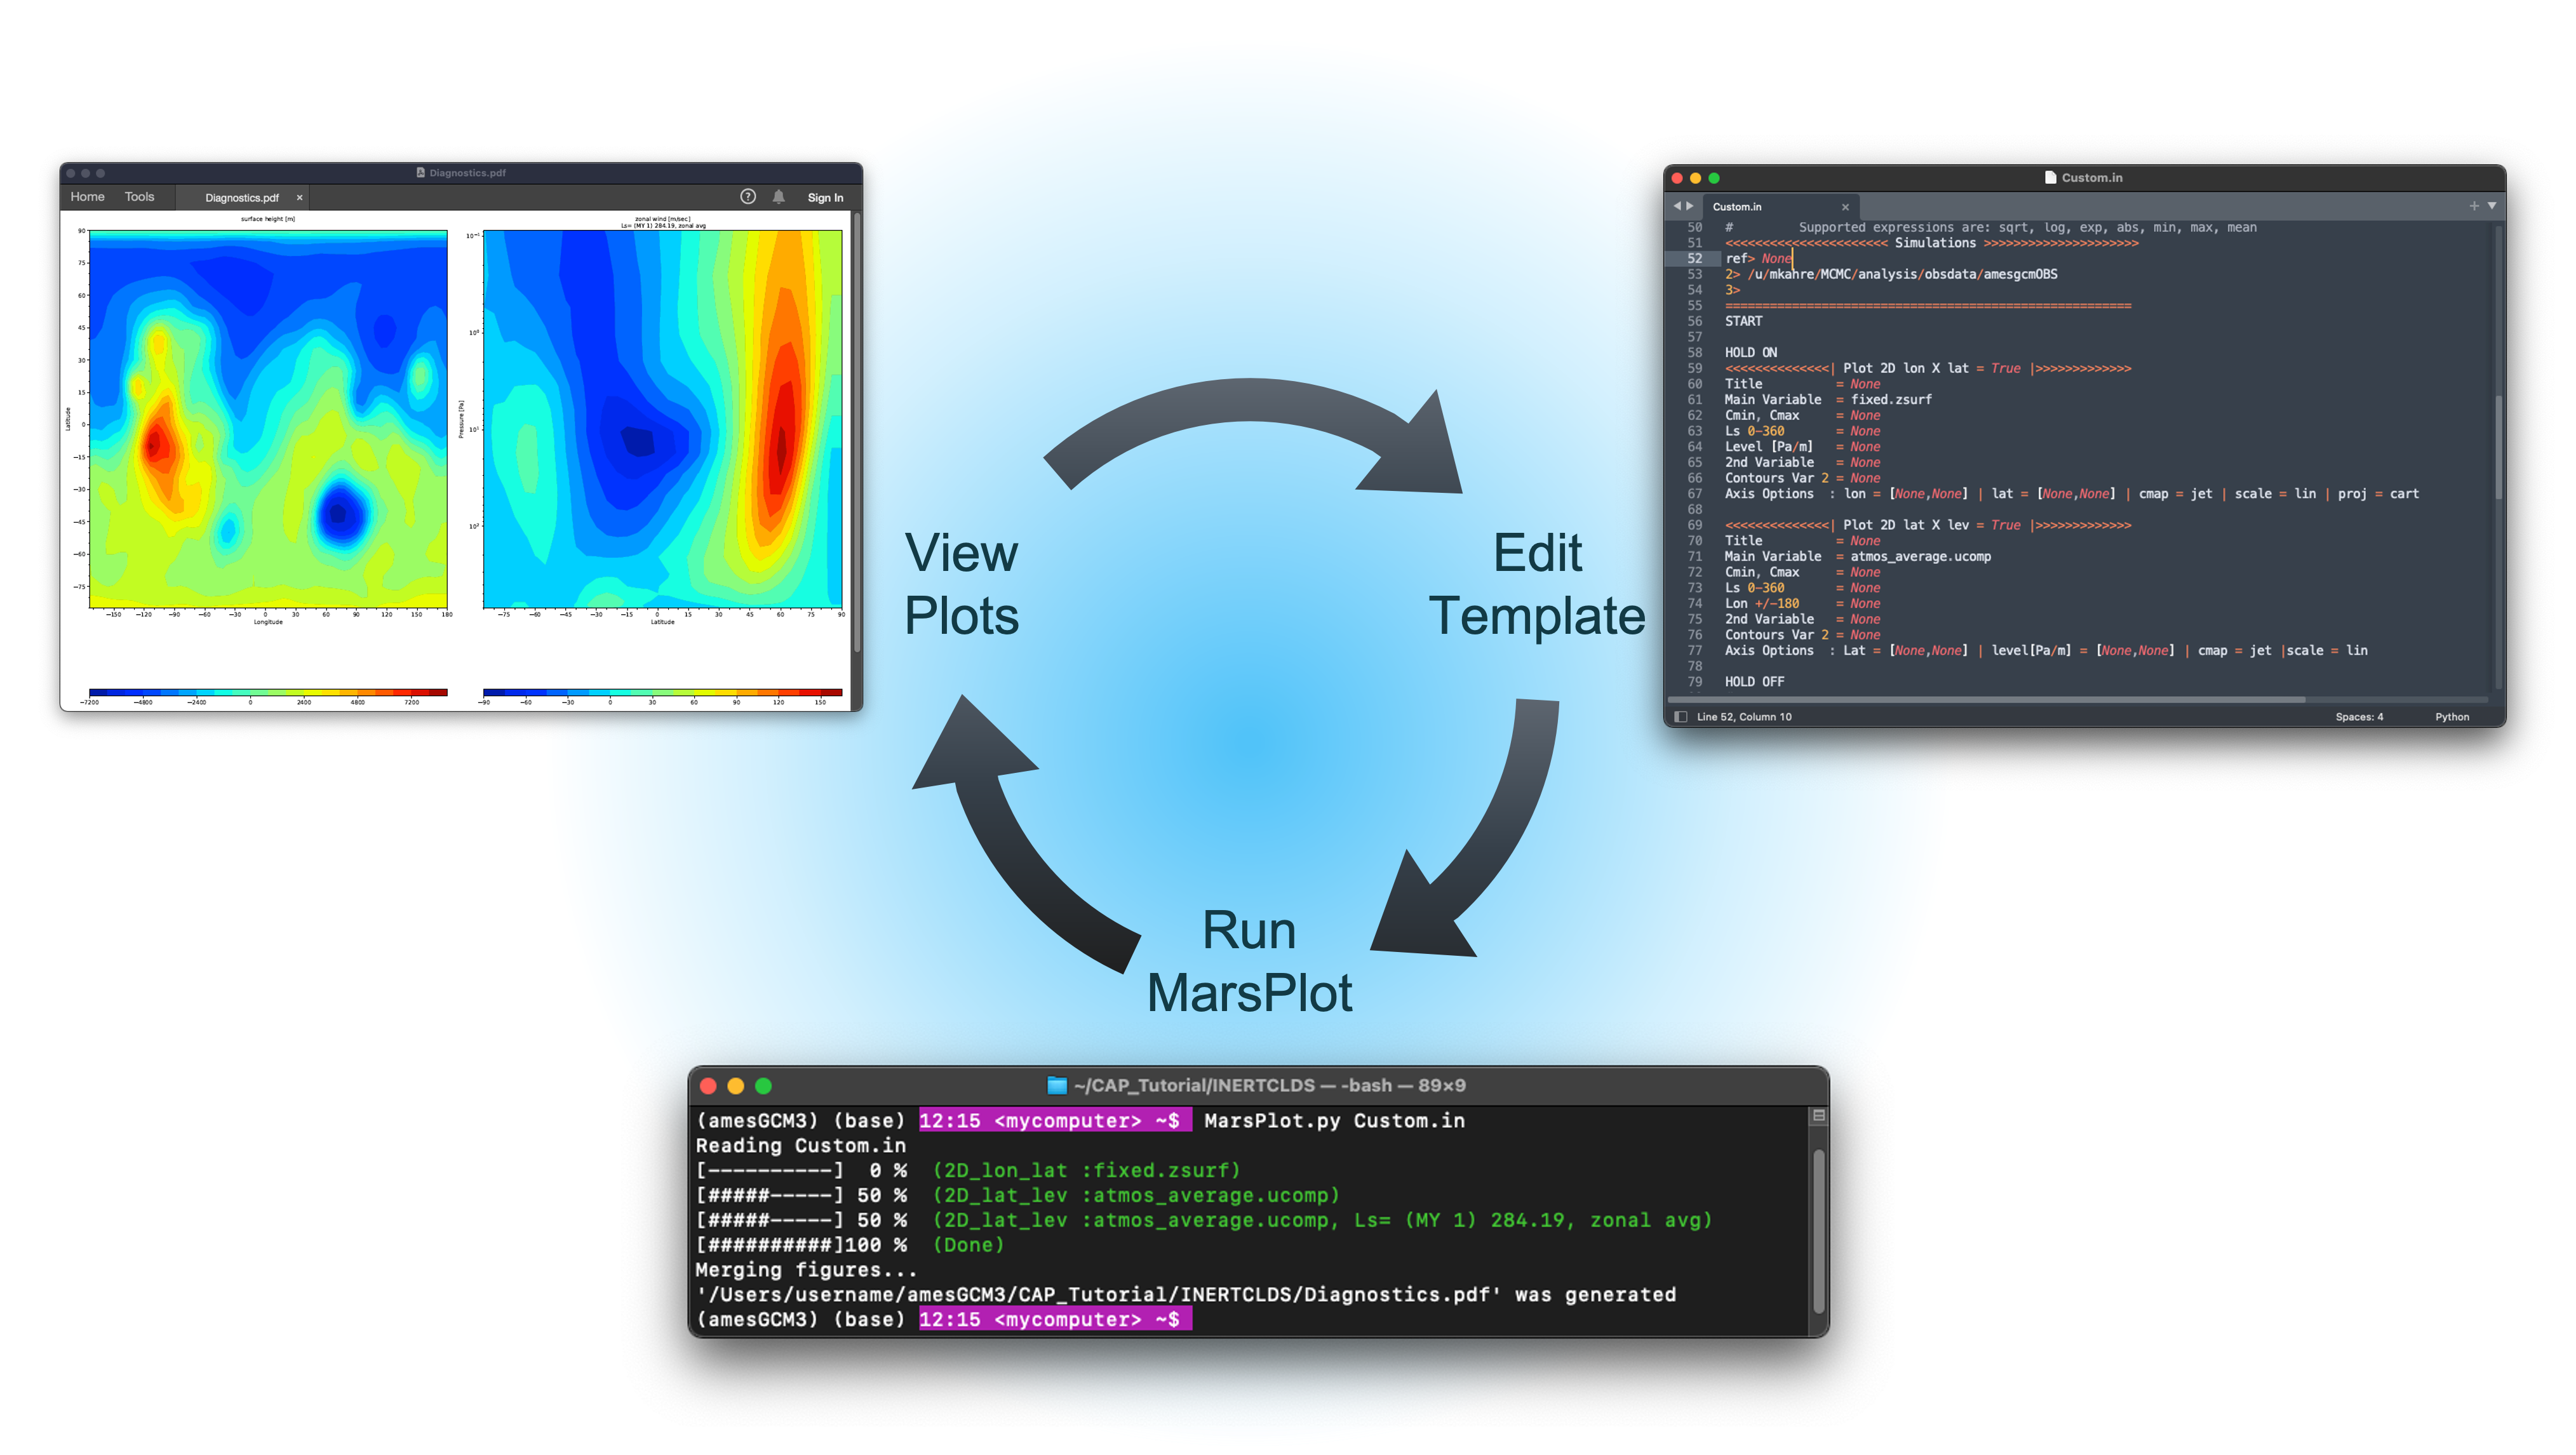

---